In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


In [2]:
tracks = pd.read_csv("C:/Users/avani/Downloads/tracks.csv")
tracks.head()


,Unnamed: 0,artist_name,track_name,release_date,genre,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [3]:
tracks.shape


(28372, 15)

In [4]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        28372 non-null  int64  
 1   artist_name       28372 non-null  object 
 2   track_name        28372 non-null  object 
 3   release_date      28372 non-null  int64  
 4   genre             28372 non-null  object 
 5   sadness           28372 non-null  float64
 6   feelings          28372 non-null  float64
 7   danceability      28372 non-null  float64
 8   loudness          28372 non-null  float64
 9   acousticness      28372 non-null  float64
 10  instrumentalness  28372 non-null  float64
 11  valence           28372 non-null  float64
 12  energy            28372 non-null  float64
 13  topic             28372 non-null  object 
 14  age               28372 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 3.2+ MB


In [5]:
tracks.isnull().sum()


Unnamed: 0          0
artist_name         0
track_name          0
release_date        0
genre               0
sadness             0
feelings            0
danceability        0
loudness            0
acousticness        0
instrumentalness    0
valence             0
energy              0
topic               0
age                 0
dtype: int64

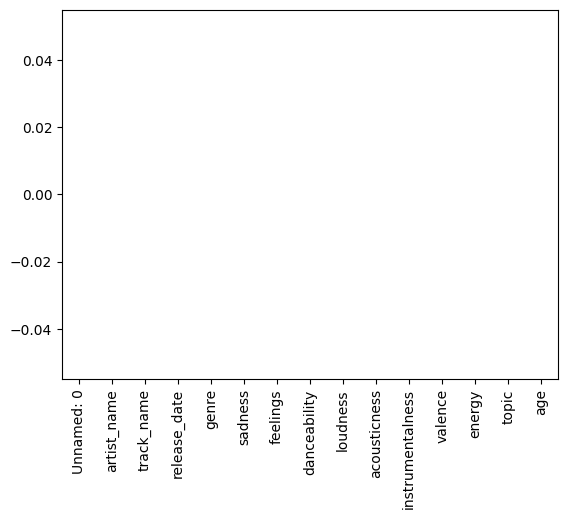

In [6]:
tracks.isnull().sum().plot.bar()
plt.show()

In [10]:
tracks['track_name'].nunique(), tracks.shape


(23689, (28372, 15))

In [17]:
tracks = tracks.sort_values(by=['feelings'], ascending=False)
tracks.drop_duplicates(subset=['track_name'], keep='first', inplace=True)

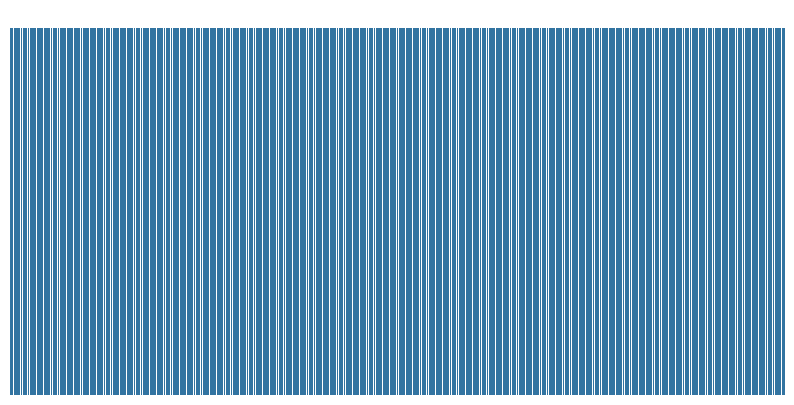

In [21]:
plt.figure(figsize = (10,5))
sb.countplot(tracks['release_date'])
plt.axis('off')
plt.show()


In [15]:
floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
    floats.append(col)

len(floats)

9

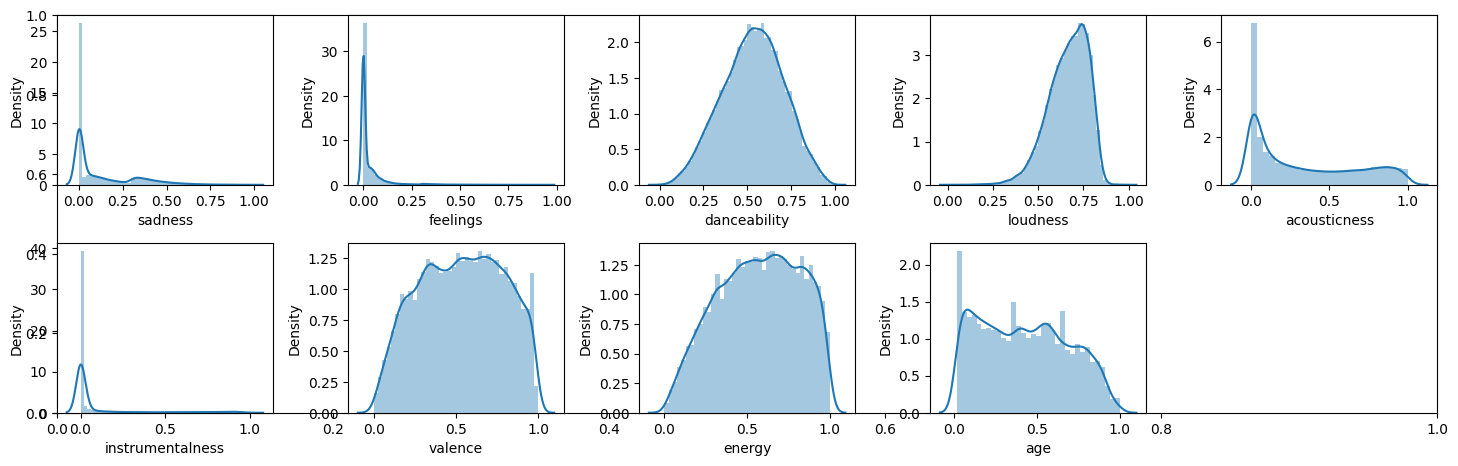

In [16]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
   plt.subplot(2, 5, i + 1)
   sb.distplot(tracks[col])
plt.tight_layout()
plt.show()


In [23]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['genre'])

In [24]:
tracks = tracks.sort_values(by=['feelings'], ascending=False).head(10000)


In [33]:
def get_similarities(song_name, data):

# Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['track_name']==song_name]['genre']).toarray()
  num_array1 = data[data['track_name']==song_name].select_dtypes(include=np.number).to_numpy()

# We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['track_name']
	
	# Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['track_name']==name]['genre']).toarray()
    num_array2 = data[data['track_name']==name].select_dtypes(include=np.number).to_numpy()

	# Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)
	
  return sim


In [55]:
def recommend_songs(song_name, data=tracks):
# Base case
  if tracks[tracks['track_name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you have entered invalid_name. Some songs you may like:\n')
	
    for song in data.sample(n=5)['track_name'].values:
      print(song)
    return

  data['similarity_factor'] = get_similarities(song_name, data)

  data.sort_values(by=['similarity_factor', 'feelings'],
				ascending = [False, False],
				inplace=True)

# First song will be the input song itself as the similarity will be highest.
  display(data[['track_name', 'artist_name']][2:7])


In [48]:
recommend_songs('here we go again')


,track_name,artist_name
10367,closing time,radney foster
10350,yellow rose of texas,hoyt axton
10374,all my love is gone,lyle lovett
10348,forever together,randy travis
10344,walkin' the floor over me,alan jackson


In [51]:
recommend_songs('day by day')

,track_name,artist_name
17784,we were in love,benny carter
17767,benson's rider,george benson
17781,toselli's serenade (dreams and memories),perry como
17768,tyree's blues,louis armstrong
17760,bye-bye,sarah vaughan


In [58]:
recommend_songs('shape of you')

This song is either not so popular or you have entered invalid_name. Some songs you may like:

barnacles
the druid
starski (live at the disco fever)
down under
take a chance
